## Neural Nets

In [2]:
import cloudpickle as cp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.utils.extmath import softmax

In [15]:
filepath = "C:/Users/Dell/Desktop/web_mining/ml/mnist.pkl"
with open(filepath, 'rb') as f:
    train_set, valid_set, test_set = cp.load(f, encoding = 'bytes')
f.close

<function BufferedReader.close>

In [34]:
X_train = train_set[0].T

digits = 10

examples = train_set[1].shape[0]
y_train_ = train_set[1].reshape(1, examples)
Y_new = np.eye(digits)[y_train_.astype('int32')]
y_train = Y_new.T.reshape(digits, examples)

X_valid = valid_set[0].T

examples = valid_set[1].shape[0]
y_valid_ = valid_set[1].reshape(1, examples)
Y_new = np.eye(digits)[y_valid_.astype('int32')]
y_valid = Y_new.T.reshape(digits, examples)

X_test = test_set[0].T
y_test = test_set[1]

examples = test_set[1].shape[0]
y_test_ = test_set[1].reshape(1, examples)
Y_new = np.eye(digits)[y_test_.astype('int32')]
y_test = Y_new.T.reshape(digits, examples)

train_examples = y_train.shape[0]
valid_examples = y_valid.shape[0]
test_examples = y_test.shape[0]


(10, 10000)


In [45]:
import math
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [46]:
def entropy_loss(y, p):
    
    L_sum = np.sum(np.multiply(y, np.log(p)))
    m = y.shape[1]
    L = -(1/m) * L_sum
    return L
   

In [37]:
class NeuralNetwork:
    def __init__(self, x, y, n_hidden_units, eta):
        self.input = x
        self.W1 = np.random.rand(n_hidden_units, self.input.shape[0])
        self.W2 = np.random.rand(10, n_hidden_units)
        self.y = y
        self.output = np.zeros((10, self.y.shape[1]))
        self.Z2 = np.zeros((10, self.y.shape[1]))
        self.N = self.y.shape[1]
        self.h1 = np.zeros((self.N, n_hidden_units))
        self.eta = eta
        self.hidden_units = n_hidden_units
        self.m = y.shape[1]
        
    def feedforward(self):
           
        self.h1 = sigmoid(np.matmul(self.W1, self.input))
        self.Z2= np.matmul(self.W2, self.h1)
        
        self.output =  np.exp(self.Z2) / np.sum(np.exp(self.Z2), axis=0)
            
    def backprop(self):
            d_Z2 = (self.output - self.y)
            d_W2 = (1/self.m) * np.matmul(d_Z2, self.h1.T)
            d_Z1 = np.matmul(self.W2.T, d_Z2) * (self.h1 * (1-self.h1))
            d_W1 = (1/self.m) * np.matmul(d_Z1, self.input.T)
            self.W1 -= self.eta * d_W1
            self.W2 -= self.eta * d_W2
            
    def loglosstrain(self):
        return entropy_loss(self.y, self.output)
    
    def run(self, X_validation, y_validation):
        input_ = X_validation
        y = y_validation
        N = y.shape[1]
        
        h1 = np.zeros((N, self.hidden_units))
        output = np.zeros((10,y.shape[1]))

        h1 = sigmoid(np.matmul(self.W1, input_))
        Z2 = np.matmul(self.W2, h1)
        output = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
            
        return np.argmax(output, axis=0), entropy_loss(y, output)        
   
       

In [38]:
if __name__ == "__main__":    
    
    nn = NeuralNetwork(X_train, y_train, 24, 0.1)
    training_loss = []
    validation_loss = []
    test_loss = []
    
    val_accuracy = []
    test_accuracy = []
    
    val_preds = []
    test_preds = []
    
    for i in range(100):
        nn.feedforward()
        nn.backprop()
        training_loss.append(nn.loglosstrain())
        epoch_count = range(1, len(training_loss)+1)
        
        val_pred, val_loss = nn.run(X_valid, y_valid)
        validation_loss.append(val_loss)
        val_accuracy.append(accuracy_score(np.argmax(y_valid, axis=0), val_pred))
        
        
        test_pred, test_loss_ = nn.run(X_test, y_test)
        test_loss.append(test_loss_)
        test_accuracy.append(accuracy_score(np.argmax(y_test, axis=0), test_pred))
        
        val_preds.append(val_pred)
        test_preds.append(test_pred)
       
        if i%10== 0:
            print('epoch:%d, loss:%f ' % (i, nn.loglosstrain()))
    
    

50000
epoch:0, loss:4.353476 
epoch:1, loss:3.440051 
epoch:2, loss:3.095123 
epoch:3, loss:2.907485 
epoch:4, loss:2.787705 
epoch:5, loss:2.699866 
epoch:6, loss:2.629749 
epoch:7, loss:2.571082 
epoch:8, loss:2.520857 
epoch:9, loss:2.477546 
epoch:10, loss:2.440342 
epoch:11, loss:2.408781 
epoch:12, loss:2.382521 
epoch:13, loss:2.361201 
epoch:14, loss:2.344370 
epoch:15, loss:2.331478 
epoch:16, loss:2.321903 
epoch:17, loss:2.315006 
epoch:18, loss:2.310184 
epoch:19, loss:2.306906 
epoch:20, loss:2.304733 
epoch:21, loss:2.303326 
epoch:22, loss:2.302432 
epoch:23, loss:2.301874 
epoch:24, loss:2.301531 
epoch:25, loss:2.301322 
epoch:26, loss:2.301197 
epoch:27, loss:2.301121 
epoch:28, loss:2.301076 
epoch:29, loss:2.301050 
epoch:30, loss:2.301034 
epoch:31, loss:2.301025 
epoch:32, loss:2.301019 
epoch:33, loss:2.301016 
epoch:34, loss:2.301014 
epoch:35, loss:2.301013 
epoch:36, loss:2.301013 
epoch:37, loss:2.301012 
epoch:38, loss:2.301012 
epoch:39, loss:2.301012 
epoc

In [43]:
print('Best accuracy on val set:', max(val_accuracy))
print('Best accuracy on test set:', max(test_accuracy))

Best accuracy on val set: 0.1064
Best accuracy on test set: 0.1135


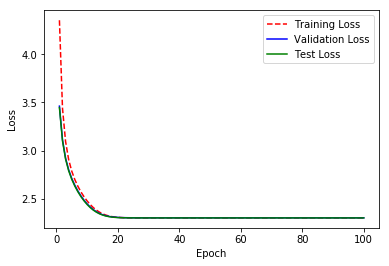

In [44]:
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.plot(epoch_count, test_loss, 'g-')
plt.legend(['Training Loss','Validation Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();